# 1. Coleta de Dados

Inicialmente a ideia é fazer uma análise do Campeonato Brasileiro - Série A, procurando uma relação entre o valor que os clubes investem em seus elencos e o quanto esse investimento dá de resultado. 
Os dados foram coletados do site Transfermarket(https://www.transfermarkt.com), que é uma plataforma que exibe detalhes financeiros de cada competição, clube e jogador do mundo. O período de análise é de 2008 até 2017, pois antes de 2008 nem todos os clubes do Brasil tinham seus dados completos e o campeonato de 2018 ainda não terminou para poder ser feita uma boa análise.

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests as rq

In [2]:
campeonatos = []
for i in range(2007,2017):
    campeonatos.append(i)
campeonatos

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [3]:
urls = []
for i in range(len(campeonatos)):
    urls.append('https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id='
                +str(campeonatos[i]))
urls

['https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2007',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2008',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2009',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2010',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2011',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2012',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2013',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id=2014',
 'https://www.transfermarkt.com/campeonato-brasileiro-serie-a/startseite/wettbewerb/BRA1/plus/?saison_id

In [43]:
#Só executar quando for fazer coleta
allNames = []
allSquads = []
allAges = []
allFPs = []
allValues = []
allAvgValues = []
allRelValues = []

allPos = []
allGDs = []
allPoints = []

headers = {'User-Agent': 'ajgan'}

for a in range(len(urls)):
    r = rq.get(urls[a], headers=headers)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    teams = parsed_page.find_all('tr')[11:31]
    positions = parsed_page.find_all('tr')[72:92]
    
    teamName = []
    teamSquad = []
    teamAge = []
    teamFP = []
    teamValue = []
    teamAvgValue = []
    teamRelValue = []

    teamPos = []
    teamGD = []
    teamPoints = []

    for i in range(len(teams)):
        teamName.append(teams[i].find_all('td')[2].text)
        teamSquad.append(int(teams[i].find_all('td')[3].text))
        teamAge.append(float(teams[i].find_all('td')[4].text.replace(",",".")))
        teamFP.append(int(teams[i].find_all('td')[5].text))
        
        value = float((teams[i].find_all('td')[6].text.replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000")))
        teamValue.append(value)
        avgValue = float((teams[i].find_all('td')[7].text.replace(" Mill. €", "0000").replace(",","").replace(" Th. €", "000")))
        teamAvgValue.append(avgValue)
        
    for j in range(len(teamName)):
        for k in range(len(positions)):
            if (teamName[j] == positions[k].find_all('a')[1].text):
                teamPos.append(int(positions[k].find_all('td')[0].text))
                teamGD.append(positions[k].find_all('td')[4].text)
                teamPoints.append(int(positions[k].find_all('td')[5].text))
                break
    
    totalLeagueValue = 0
    for m in range(len(teams)):
        teamName[m] = teamName[m] + " - " + str(campeonatos[a]+1)
        totalLeagueValue += teamValue[m]
    
    for n in range(len(teams)):
        teamRelValue.append(teamValue[n]/totalLeagueValue)
        
        
    allNames.extend(teamName)
    allSquads.extend(teamSquad)
    allAges.extend(teamAge)
    allFPs.extend(teamFP)
    allValues.extend(teamValue)
    allAvgValues.extend(teamAvgValue)
    allRelValues.extend(teamRelValue)

    allPos.extend(teamPos)
    allGDs.extend(teamGD)
    allPoints.extend(teamPoints)

In [44]:
#Só executar pós-coleta
columns = ['Equipe', 'Pos', 'Pts', 'SG', 'TamanhoElenco', 'IdadeElenco', 'JogadoresEstrangeiros','Valor', 'ValorMedio', 'ValorRelativo']
brasileirao = pd.DataFrame(list(zip(allNames, allPos, allPoints, allGDs, allSquads, allAges, allFPs, allValues, allAvgValues, allRelValues))
                          , columns=columns)
brasileirao.to_csv("brasileirao.csv")

In [4]:
#Só executar se a coleta já tiver sido feita
brasileirao = pd.read_csv("brasileirao.csv", index_col=0)

In [5]:
brasileirao

,Equipe,Pos,Pts,SG,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,Valor,ValorMedio,ValorRelativo
0,São Paulo - 2008,1,75,30,41,24.2,1,54150000.0,1320000.0,0.298232
1,Palmeiras - 2008,4,65,10,28,23.4,1,23600000.0,843000.0,0.129977
2,Flamengo - 2008,5,64,20,30,23.5,1,18500000.0,617000.0,0.101889
3,Internacional - 2008,6,54,1,34,23.3,4,18000000.0,529000.0,0.099135
4,Grêmio - 2008,2,72,24,34,22.7,1,11900000.0,350000.0,0.065539
5,Fluminense - 2008,14,45,1,35,23.2,1,8700000.0,249000.0,0.047915
6,Portuguesa - 2008,19,38,-22,33,24.8,1,6150000.0,186000.0,0.033871
7,Santos FC - 2008,15,45,-9,29,22.4,3,6050000.0,209000.0,0.033320
8,Atlético-MG - 2008,12,48,-10,42,23.4,4,5540000.0,132000.0,0.030512
9,Cruzeiro - 2008,3,67,15,25,23.1,1,4950000.0,198000.0,0.027262


In [6]:
brasileirao.describe()

,Pos,Pts,SG,TamanhoElenco,IdadeElenco,JogadoresEstrangeiros,Valor,ValorMedio,ValorRelativo
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.00000,2.000000e+02,2.000000e+02,200.000000
mean,10.500000,51.86000,0.010000,41.150000,23.988500,2.59000,3.539675e+07,8.462600e+05,0.050000
std,5.780751,11.38148,15.111974,9.684858,0.937289,1.97774,2.615462e+07,5.883257e+05,0.036932
min,1.000000,20.00000,-57.000000,20.000000,21.600000,0.00000,1.000000e+06,3.000000e+04,0.004876
25%,5.750000,45.00000,-9.000000,34.000000,23.300000,1.00000,1.385000e+07,3.437500e+05,0.020603
50%,10.500000,51.00000,-1.000000,41.000000,23.950000,2.00000,3.009000e+07,7.585000e+05,0.040720
75%,15.250000,59.00000,11.000000,47.250000,24.600000,4.00000,5.308250e+07,1.320000e+06,0.072632
max,20.000000,81.00000,40.000000,77.000000,26.500000,8.00000,1.158000e+08,2.520000e+06,0.298232


Alguns pontos interessantes de se destacar são:
- Em geral, os clubes brasileiros tem elencos muito grandes. Em um esporte que só jogam 11 de cada vez, ter uma média de elenco beirando os 41 é algo muito alto. Além diso, o valor máximo e mínimo assustam muito, ao percebermos que algum clube teve um elenco de 77 jogadores e outro de apenas 20.
- A média de idade dos clubes brasileiros é relativamente baixa. Talvez por existirem muitos jogadores jovens no futebol brasileiro e esses serem baratos, mas de boa qualidade.
- A média de jogadores estrangeiros ficar em 2,59. Eu esperava um número menor, pois não me aparenta ter de 2 a 3 estrangeiros em cada clube. Mas essa média passa a ser bem aceitável por conta do terceiro quartil e do valor máximo. A minha impressão errada se justifica pelo valor do primeiro quartil e também porque esses dados cobrem todo o elenco e alguns jogadores estrangeiros podem passar desapercebidos pelo grande público.
- A distância que temos entre o valor máximo investido e o valor do terceiro quartil dos dados. O clube que mais investiu tem praticamente o dobro do investimento do clube representante do terceiro quartil.
- Na parte do valor relativo os números tem um comportamento bem normal, menos no valor máximo, quando notamos que um clube teve um investimento que representa sozinho 30% do investimento de todos os 20 clubes juntos.

Com esse dataset foi feita uma visualização usando <b>d3.js</b> para tentar analisar a relação entre o dinheiro investido pelo clube e sua posição final na tabela. A escolha de usar d3 foi por conta da versatilidade da ferramenta e de sua qualidade. <br>A visualização pode ser acessada através do arquivo <b>brasileiraov1.html</b> que está no mesmo diretório desse Notebook.
<br>Visualizações mais simples foram feitas usando Seaborn apenas para manter tudo documentado no próprio Notebook

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

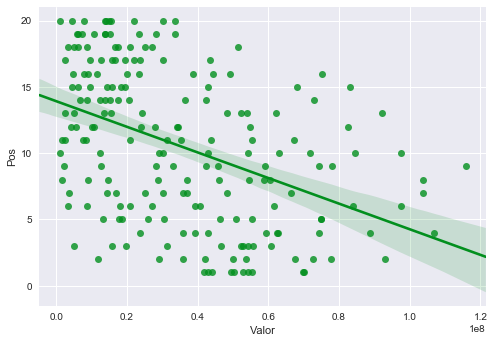

In [8]:
ax = sns.regplot(x=brasileirao["Valor"], y=brasileirao["Pos"], color=sns.xkcd_rgb["emerald green"])
plt.show(ax)

In [9]:
model = smf.ols("Pos ~ Valor",data=brasileirao)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pos   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     46.75
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           9.79e-11
Time:                        00:33:07   Log-Likelihood:                -613.00
No. Observations:                 200   AIC:                             1230.
Df Residuals:                     198   BIC:                             1237.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9191      0.621     22.405      0.000      12.694      15.144
Valor      -9.659e-08   1.41e-08     -6.837      0.000   -1.24e-07   -6.87e-08
==============================================================================
Omnibus:                       62.550   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.888
Skew:                          -0.098   Prob(JB):                      0.00432
Kurtosis:                       1.874   Cond. No.                     7.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir desse modelo de regressão se constata que existe uma relação entre o valor investido pelo clube e sua posição  final na tabela. Como a melhor posição possível é a de menor valor, a relação é inversa e mostra que se um clube não investisse dinheiro nenhum, a regressão o colocaria em 14º(cenário impossível, mas apenas hipotético). A regressão também nos mostra que pra cada 10 milhões de Euro investido o clube diminui uma posição(o que na verdade significa que ele ganha uma posição, tendo em vista a relação inversa).

Apesar de percebermos que existe uma relação, ela é um pouco fraca e não nos diz tanto. Fazendo uso da interatividade do d3, podemos perceber que os valores investidos mudam muito com o decorrer dos anos e a relação individual de cada campeonato é bem mais significativa de medir, já que os valores de cada clube estão relacionados com a relaidade do mercado para o ano correspondente. <br>Para fazer uma boa análise, é melhor olhar ano a ano. Observando cada campeonato individualmente, fica bem mais clara a relação entre dinheiro e resultado(exceto no campeonato de 2013, como pode ser observado na visualização interativa).

Numa realidade em que os clubes possuem orçamento restrito e assumindo que eles não tem disponível além do que o investido, é inviável dizer que basta um clube investir mais e eles se sairão melhor. Temos que partir da premissa que o clube possui um orçamento fixo, mas precisa se dar bem, mesmo que esse valor disponível seja baixo. Diante dessa situação, resolvi analisar mais a fundo a realidade do futebol nordestino e ver quais campanhas deram certo e quais deram errado, para ver se existe algum padrão nessas campanhas. Existindo algum padrão, fica bem mais viável dizer como os clubes devem investir o seu pouco dinheiro e mesmo assim fazer uma boa campanha. Levando em conta os clubes pernambucanos temos(campanhas de sucesso em negrito):
- Santa Cruz: 1 campanha - 2016
- Ceará: 2 campanhas - <b>2010</b>, 2011
- Náutico: 4 campanhas - <b>2008</b>, 2009, <b>2012</b>, 2013
- Bahia: 5 campanhas - <b>2011</b>, <b>2012</b>, <b>2013</b>, 2014 <b>2017</b>
- Vitória: 7 campanhas - <b>2008</b>, <b>2009</b>, 2010, <b>2013</b>, 2014, <b>2016</b>, <b>2017</b>
- Sport: 7 campanhas <b>2008</b>, 2009, 2012, <b>2014</b>, <b>2015</b>, <b>2016</b>, <b>2017</b>

No total temos 26 participações de clubes nordestinos, sendo que 17 não resultaram em rebaixamento. Acredito que essa quantidade seja o suficiente para extrair algumas informações úteis.